# **Using optimization algorithms packages on Python to optimize Ackley function**

**Step 1:** If you don't already have scipy, install it using the following command in a code cell in Google Colab:

In [1]:
# Install DEAP if not already installed
!pip install scipy

**Step 2:** Plot the Ackley Function to have a better understanding about what we want to minimize.

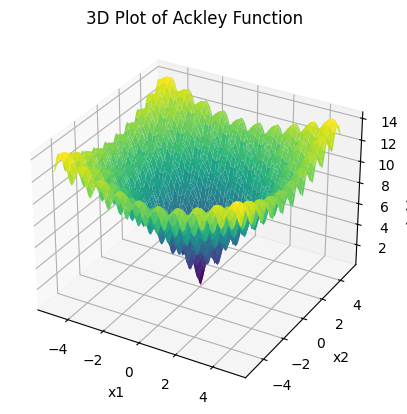

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Define the Ackley function
def ackley(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.exp(1) + 20



# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

# Create a 3D plot of the Ackley function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Ackley Value')
ax.set_title('3D Plot of Ackley Function')

plt.show()

You can see at x1=0 and x2=0 the value of function Ackley is equal to zero which is the minimum possible.

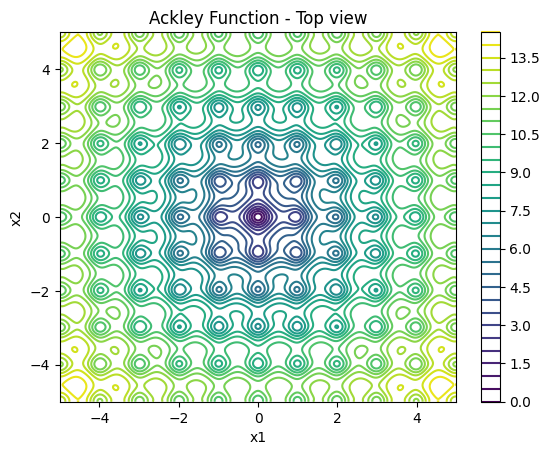

In [3]:
# Create a grid of x and y values
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

# Create a contour plot of the Ackley function
plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.colorbar()
plt.title('Ackley Function - Top view')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**Step 3:** Optimize the Ackley Function:
So we have two variables that we can change (x1 and x2 called decision variables) to change the value of Ackley function (objective function). We can have an initial guess `initial_guess = [-2, +2]` (x1=-2 and x2=+2) in to use in `minimize` function in `scipy` library. This is a **local optimizer** and the results highly depend on the initial guess. You can see every time you change the initial guess a new optimized solution will be achieved.

Optimal solution: [-1.97442506  1.97445789]
Minimum value: 6.559645395501416


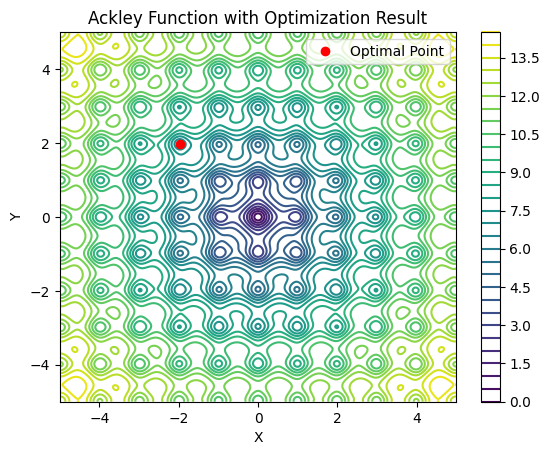

In [6]:
from scipy.optimize import minimize

# Define the Ackley function for minimization
def ackley_for_optimization(x):
    return ackley(x[0], x[1])

# Initial guess
initial_guess = [-2, +2]

# Optimize the Ackley function using the Nelder-Mead method
result = minimize(ackley_for_optimization, initial_guess, method='nelder-mead')

# Print the optimization result
print("Optimal solution:", result.x)
print("Minimum value:", result.fun)

# Plot the optimized point on the Ackley function
plt.contour(X, Y, Z, levels=30, cmap='viridis')
plt.colorbar()
plt.title('Ackley Function with Optimization Result')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(result.x[0], result.x[1], 'ro', label='Optimal Point')
plt.legend()
plt.show()

**Why?** The Ackley function is known for having many local minima, which can make it challenging to optimize using traditional gradient-based methods. If you're consistently getting stuck in local minima, you can try the following strategies **to improve the optimization**:



**1. Multi-Start Optimization:** Perform multiple optimization runs with different initial guesses to increase the chances of escaping local minima. You can do this with the Nelder-Mead method or other local optimization methods:

In [35]:
from scipy.optimize import minimize

num_starts = 500  # Number of different initial guesses

optimal_results = []
for _ in range(num_starts):
    initial_guess = [np.random.uniform(-5, 5), np.random.uniform(-5, 5)]
    result = minimize(ackley_for_optimization, initial_guess, method='nelder-mead')
    optimal_results.append(result)

# Find the best result
best_result = min(optimal_results, key=lambda x: x.fun)
print(best_result)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 3.7660050445254e-05
             x: [-1.113e-06 -1.327e-05]
           nit: 56
          nfev: 107
 final_simplex: (array([[-1.113e-06, -1.327e-05],
                       [ 1.402e-05, -7.887e-06],
                       [ 4.785e-08,  3.613e-05]]), array([ 3.766e-05,  4.551e-05,  1.022e-04]))


The optimal solution is shown in the line `x:` and the objective function at this point is shown in the line `fun:`. **Much better!**

**2. Global Optimization Methods:** Use global optimization algorithms, like **Differential Evolution Algorithm**, that are better at exploring the search space to find the global minimum. Differential Evolution (DE) is a popular global optimization algorithm that is particularly well-suited for continuous, nonlinear optimization problems. DE is a population-based algorithm inspired by genetic algorithms, and it operates by evolving a population of candidate solutions (vectors) over several generations to search for the global minimum of a given objective function. The key idea behind DE is to perform mutation, crossover, and selection operations to explore the search space effectively. ***This is what you are doing in C. You are developing a global optimizer (in your case it is Genetic Algorithm).*** In the following code, the lower and upper bound for each guess for x1 and x2 is (-5, 5).

In [49]:
from scipy.optimize import differential_evolution

# Define the bounds for the optimization
bounds = [(-5, 5), (-5, 5)]

result = differential_evolution(ackley_for_optimization, bounds)

print(result)

 message: Optimization terminated successfully.
 success: True
     fun: 0.0
       x: [ 0.000e+00  0.000e+00]
     nit: 94
    nfev: 2913


**Perfect!** It is fast, user friendly to use, and efficient to find the most optimized solution. At one point maybe you develop a code in C/C++ better than this! We know this is right answer. But don't forget most of times, we don't know how much we can be better. In this case we are optimizing a simple example, and the results are good. There are steps that you should take if the results were not good:

**3. Adaptive Methods:** Use optimization algorithms with adaptive strategies that change the exploration-exploitation trade-off as the optimization progresses. One such algorithm is the Simulated Annealing algorithm. The scipy.optimize.anneal function can be used for this.

**4. Parameter Tuning:** Experiment with different optimization algorithm parameters such as step size, tolerance, and max iterations. These parameters can significantly impact the optimization process.

**5. Use a Different Function:** If your goal is to experiment with optimization methods and not specifically with the Ackley function, you might consider using other functions that are less challenging to optimize! Well this one is not actually up to you! If you are given a specific problem to optimize, you can't run away from it! ***Even if there is no way, an engineer always makes one!***